<a href="https://colab.research.google.com/github/ThanabordeeN/AI_mini_Project/blob/main/Minst_Image_Gray_Scale_PROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles #importing sklearonn for generate dataset
import pandas as pd
import tensorflow as tf
import numpy as np


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist #โหลดไฟล์จาก Cloud
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
y_train[:20]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4],
      dtype=uint8)

9


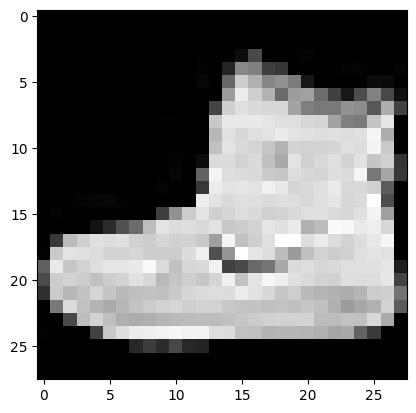

In [ ]:
plt.imshow(x_train[0],cmap='gray'); #แสดงรูปภาพในสิ่งที่มันควรจะเป็นคือ ขาวดำ ตั้งต้น
print(y_train[0])

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0 #ทำการ Normalize ค่าที่จะไป train เพือผลลัพธ์ที่ดีที่สุดและเร็วต่อการ train


In [ ]:
# Set random seed
tf.random.set_seed(42)
# Create the model
model1 = tf.keras.Sequential([
tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (reshape 28x28 to 784, by Flatten layer)
tf.keras.layers.Dense(100, activation="relu"),
tf.keras.layers.Dense(50, activation="relu"),
tf.keras.layers.Dense(20, activation="relu"),
tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax ขึ้นอยู่กับจำนวน OUTPUT
])
# Compile the model
model1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # loss function for multiclass classifcation
optimizer=tf.keras.optimizers.Adam(),
metrics=['accuracy'])
# Fit the model
train_history = model1.fit(x_train,
y_train,
epochs=30,
validation_data=(x_test, y_test)) #see how the model performs on the test set during training

Epoch 1/30
1875/1875 [==============================] - 10s 4ms/step - loss: 0.5227 - accuracy: 0.8149 - val_loss: 0.4322 - val_accuracy: 0.8450
Epoch 2/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3775 - accuracy: 0.8627 - val_loss: 0.4451 - val_accuracy: 0.8458
Epoch 3/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3428 - accuracy: 0.8740 - val_loss: 0.3780 - val_accuracy: 0.8608
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3205 - accuracy: 0.8819 - val_loss: 0.3768 - val_accuracy: 0.8643
Epoch 5/30
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3026 - accuracy: 0.8870 - val_loss: 0.3579 - val_accuracy: 0.8723
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2889 - accuracy: 0.8923 - val_loss: 0.3674 - val_accuracy: 0.8668
Epoch 7/30
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2789 - accuracy: 0.8954 - val_loss: 0.3557 - val_accuracy

Text(0.5, 1.0, 'Model validation curve')

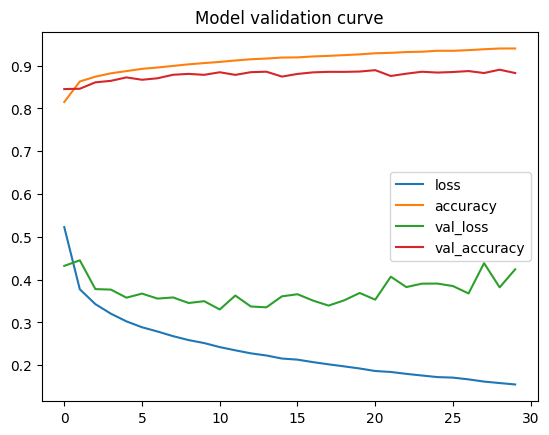

In [ ]:
pd.DataFrame(train_history.history).plot()
plt.title("Model validation curve")

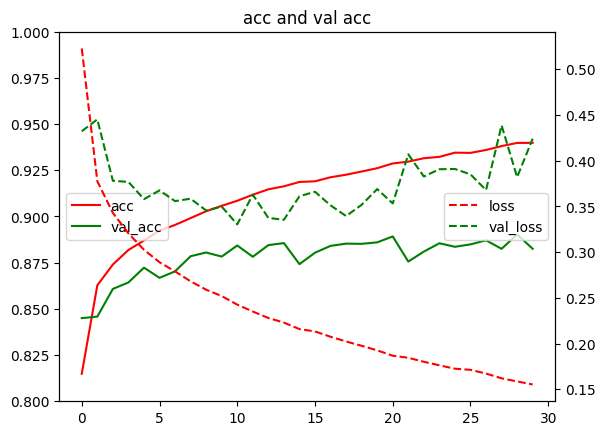

In [ ]:
fig=plt.figure(5)
ax1=fig.gca()
ax1.set_title('acc and val acc')
ax1.plot(train_history.history['accuracy'],'r',label = 'acc')
ax1.plot(train_history.history['val_accuracy'],'g',label = 'val_acc')
ax1.legend(loc='center left')
ax1.set_ylim(0.8,1)

ax2=ax1.twinx()
ax2.plot(train_history.history['loss'],'r--',label = 'loss')
ax2.plot(train_history.history['val_loss'],'g--',label = 'val_loss')
ax2.legend(loc='center right')
#ax2.set_ylim(0.8,1)
plt.show()


1/1 [==============================] - 0s 22ms/step
[[1.3701414e-24]
 [1.0000000e+00]
 [4.5416745e-27]
 [8.5247844e-17]
 [3.2515113e-21]
 [0.0000000e+00]
 [2.5521125e-20]
 [0.0000000e+00]
 [2.3905933e-27]
 [0.0000000e+00]]
prediction= Trouser


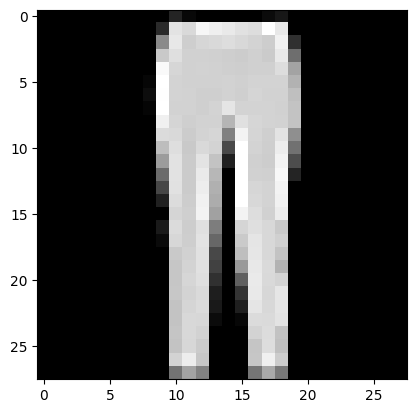

In [ ]:
picnum = 555
pred = model1.predict(np.reshape(x_test[picnum],(1,28,28))) #การเดาค่าด้วยการโยน y เข้าไป
plt.imshow(x_test[picnum],cmap='gray')
print(np.reshape(pred,(10,1)))
maxpos=np.argmax(pred)
class_name=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print("prediction= %s"%class_name[maxpos])

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix
# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
# Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with
  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)
  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
    # Label the axes
  ax.set(title="Confusion Matrix",
    xlabel="Predicted label",
    ylabel="True label",
    xticks=np.arange(n_classes), # create enough axis slots for each class
    yticks=np.arange(n_classes),
    xticklabels=labels, # axes will labeled with class names (if they exist) or ints
    yticklabels=labels)
    # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()
    # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.
    # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
    horizontalalignment="center",
    color="white" if cm[i, j] > threshold else "black",
    size=text_size)

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

313/313 [==============================] - 1s 2ms/step


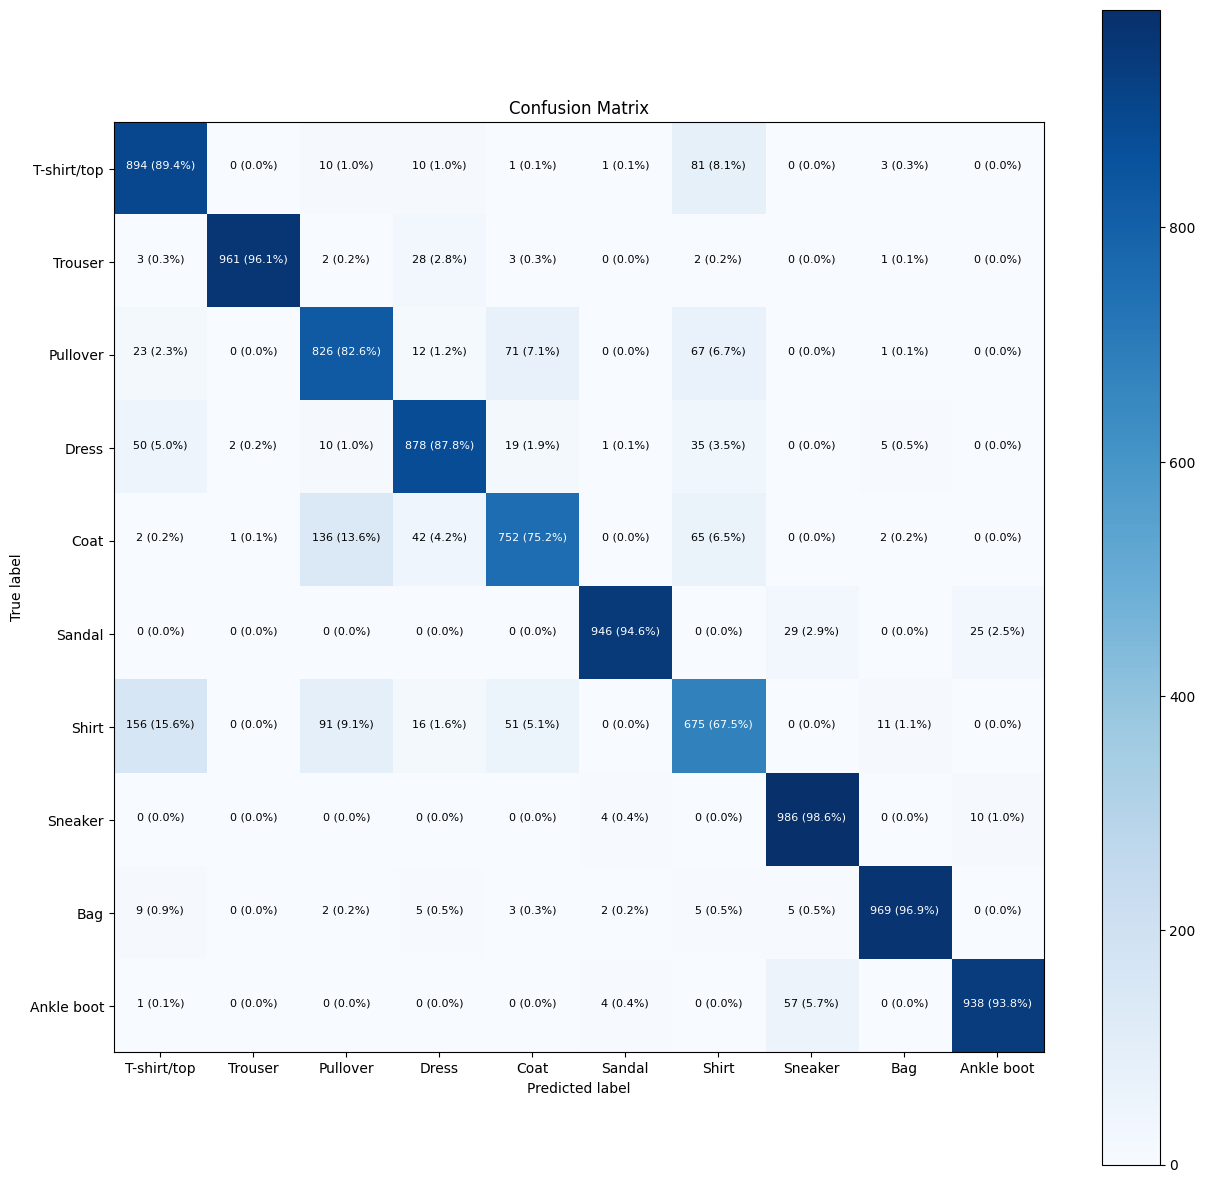

In [ ]:
from sklearn.metrics import confusion_matrix
# Convert all of the predictions from probabilities to labels
y_probs = model1.predict(x_test)
y_preds = y_probs.argmax(axis=1)
# View the first 10 prediction labels
y_preds[:10]
confusion_matrix(y_true=y_test,
y_pred=y_preds)
make_confusion_matrix(y_true=y_test,
y_pred=y_preds,classes=class_name,figsize=(15,15),text_size=8)